MCMC

https://pymc-devs.github.io/pymc/tutorial.html

In [1]:
import pymc
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform

In [3]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [4]:
#スイッチポイントの事前分布
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110 ,doc='Switchpoint[year]')

In [5]:
#early meanとlate meanの事前分布
early_mean = Exponential('early_mean', beta=1.)
late_mean = Exponential('late_mean',beta=1.)

In [6]:
@deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    '''Concatenate Poisson means'''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [7]:
disasters = Poisson('disasters', mu=rate, value=disasters_array, observed=True)

In [8]:
from pymc.examples import disaster_model
disaster_model.switchpoint.parents

{'lower': 0, 'upper': 110}

In [10]:
disaster_model.disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7fb58d5c7b50>}

In [11]:
disaster_model.rate.children

{<pymc.distributions.Poisson 'disasters' at 0x7fb58d5c7c10>}

In [13]:
disaster_model.early_mean.children

{<pymc.PyMCObjects.Deterministic 'rate' at 0x7fb58d5c7b50>}

In [19]:
mymodel = pymc.Model(disaster_model)
mygraph = pymc.graph.graph(mymodel)
mygraph.write_png('model_graph.png')

True

(-0.5, 460.5, 303.5, -0.5)

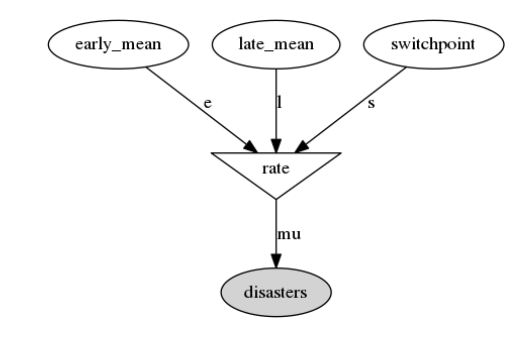

In [22]:
from PIL import Image

im = Image.open('model_graph.png')
plt.imshow(im)
plt.axis('off')

In [23]:
disaster_model.disasters.value

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [25]:
#ランダムな初期値
disaster_model.switchpoint.value

array(89)

In [26]:
disaster_model.early_mean.value

array(0.5176002047916041)

In [27]:
disaster_model.late_mean.value

array(0.43514013040759586)

In [28]:
disaster_model.rate.value

array([ 0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,
        0.5176002 ,  0.5176002 ,  0.5176002 ,  0.5176002 ,  0.51

In [29]:
from pymc import MCMC
M = MCMC(disaster_model)

In [30]:
M.sample(iter=10000,burn=1000,thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 2.9 sec

In [33]:
M.trace('switchpoint')[:]

array([41, 41, 39, 39, 39, 40, 40, 40, 40, 40, 41, 37, 37, 37, 41, 41, 41,
       36, 36, 39, 46, 46, 44, 37, 37, 40, 43, 42, 41, 41, 40, 40, 40, 41,
       40, 41, 41, 41, 41, 41, 41, 40, 40, 39, 36, 36, 42, 36, 39, 41, 37,
       37, 42, 41, 40, 42, 42, 41, 36, 40, 39, 42, 42, 42, 42, 41, 41, 41,
       37, 42, 39, 36, 41, 41, 41, 39, 39, 38, 41, 37, 37, 40, 39, 36, 41,
       41, 41, 40, 40, 39, 39, 46, 46, 46, 40, 40, 43, 39, 39, 38, 47, 44,
       41, 41, 39, 39, 39, 41, 39, 39, 36, 36, 36, 36, 36, 42, 42, 37, 39,
       42, 39, 37, 37, 37, 40, 40, 40, 40, 37, 41, 41, 43, 43, 43, 43, 43,
       36, 43, 41, 41, 39, 43, 39, 40, 40, 39, 42, 42, 39, 40, 40, 41, 40,
       41, 41, 41, 44, 42, 42, 40, 40, 34, 37, 37, 39, 39, 39, 39, 37, 39,
       39, 37, 37, 42, 39, 41, 40, 37, 42, 42, 42, 42, 42, 38, 40, 40, 40,
       42, 46, 46, 44, 39, 40, 40, 40, 40, 36, 40, 40, 39, 42, 42, 42, 42,
       42, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 32, 45, 45, 45, 35, 40,
       37, 40, 40, 40, 42

(array([ 0.00196078,  0.05607843,  0.15058824,  0.12078431,  0.02156863,
         0.00196078]),
 array([ 32.        ,  34.83333333,  37.66666667,  40.5       ,
         43.33333333,  46.16666667,  49.        ]),
 <a list of 6 Patch objects>)

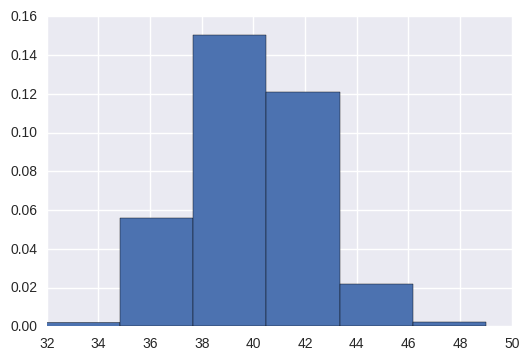

In [38]:
plt.hist(M.trace('switchpoint')[:],bins=6,normed=True)

Plotting late_mean
Plotting switchpoint
Plotting early_mean


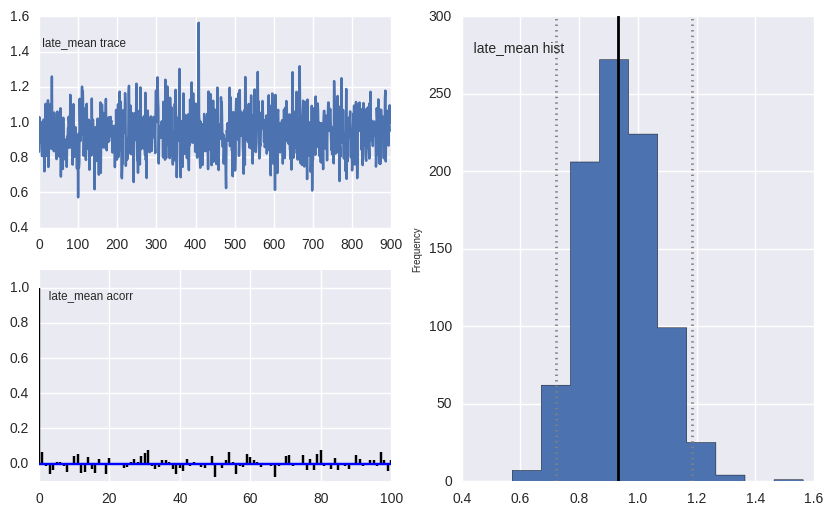

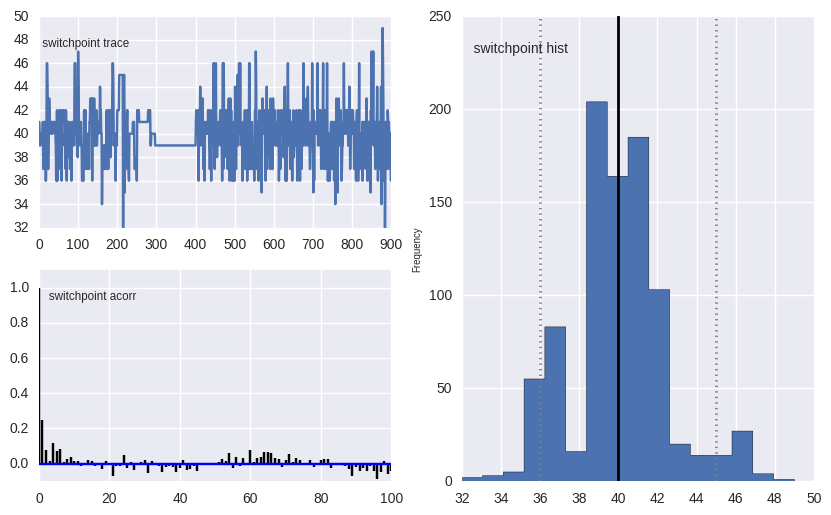

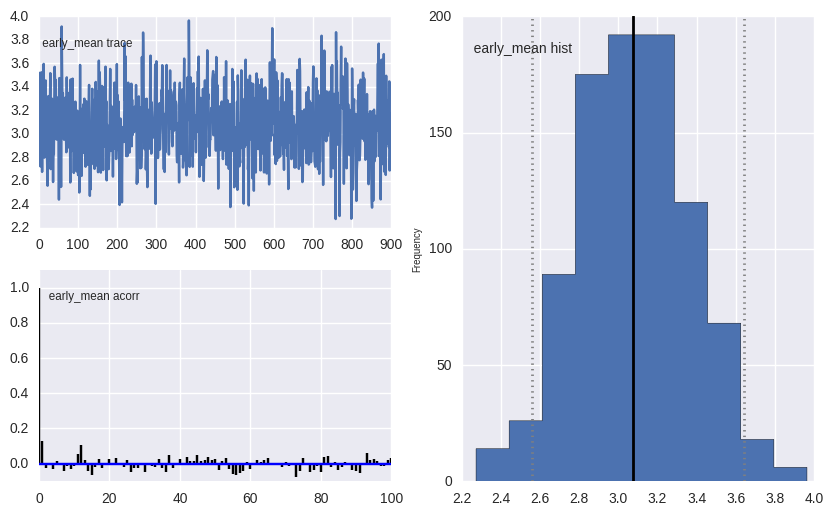

In [39]:
from pymc.Matplot import plot
plot(M)